In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
with open('./data/raft-data.pickle', 'rb') as fd:
    data = pickle.load(fd)

In [3]:
index = 0
batch = 0
x, y = 225, 170
# x, y = 500, 300

line = [(x // 8, y // 8)]
for d in data[index]['delta']:
    cx, cy = line[-1]
    dx, dy = d[batch, :, y // 8, x // 8]

    line.append((cx + dx, cy + dy))

line = np.array(line) * 8
line

array([[224.        , 168.        ],
       [237.76436901, 126.13805389],
       [240.62969685, 126.84678602],
       [242.27774513, 126.70542522],
       [244.02992034, 125.8275189 ],
       [243.99811302, 126.24797516],
       [243.86357516, 126.40676489],
       [243.45227295, 126.19983156],
       [243.60061418, 126.09641939],
       [243.50943542, 126.00222662],
       [244.01186413, 125.92123128],
       [244.18047513, 125.70759081],
       [244.58946736, 125.69379804]])

<IPython.core.display.Javascript object>


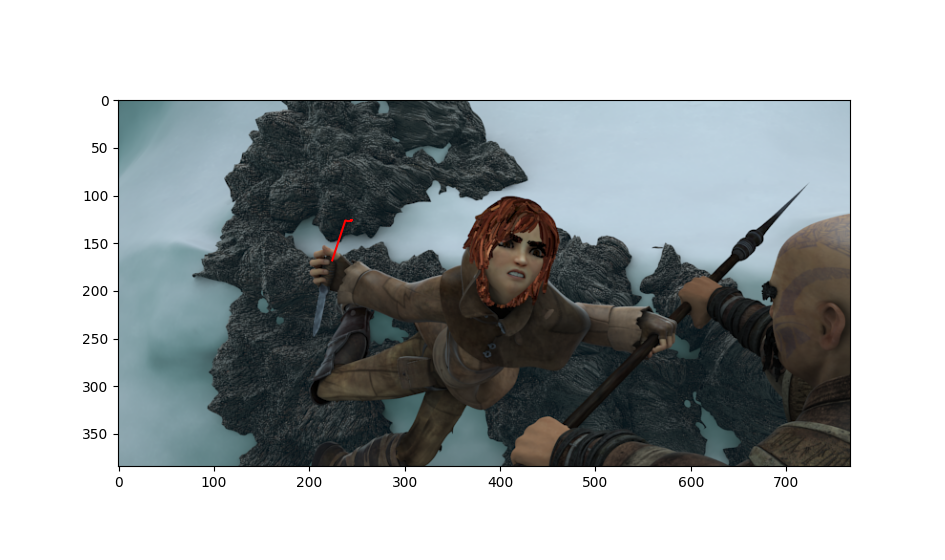

In [4]:
img1 = data[index]['img1'][batch].transpose(1, 2, 0) / 2 + 0.5
plt.imshow(img1)
plt.plot(*zip(*line), color='red')
plt.show()

<IPython.core.display.Javascript object>


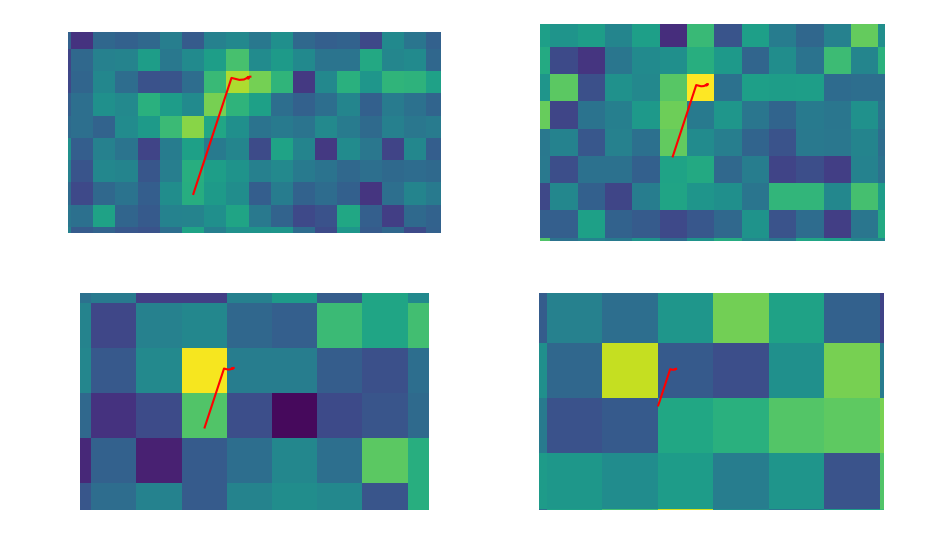

In [5]:
corr = data[index]['corr']

fig, axs = plt.subplots(2, 2)
fig.tight_layout()

axs[0, 0].imshow(corr[0][batch, y // 8, x // 8, 0, :, :])
axs[0, 0].plot(*zip(*(line / 8)), color='red')
axs[0, 0].set_axis_off()

axs[0, 1].imshow(corr[1][batch, y // 8, x // 8, 0, :, :])
axs[0, 1].plot(*zip(*(line / 16)), color='red')
axs[0, 1].set_axis_off()

axs[1, 0].imshow(corr[2][batch, y // 8, x // 8, 0, :, :])
axs[1, 0].plot(*zip(*(line / 32)), color='red')
axs[1, 0].set_axis_off()

axs[1, 1].imshow(corr[3][batch, y // 8, x // 8, 0, :, :])
axs[1, 1].plot(*zip(*(line / 64)), color='red')
axs[1, 1].set_axis_off()

plt.show()